# Eploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

### loading the dataset in

In [2]:
df = pd.read_csv('D:\Cardio.csv')

In [3]:
print('The dataset shape contains:',df.shape)

The dataset shape contains: (70000, 13)


##### As you can see here it gives a glimpse into what the dataset contains at the moment. 
##### You will also see further down the notebook the columns here will surely change.

In [32]:
df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,BMI
0,51,1,62.0,110,80,1,1,0,21.967120
1,56,0,85.0,140,90,3,1,1,34.927679
2,52,0,64.0,130,70,3,1,1,23.507805
3,49,1,82.0,150,100,1,1,1,28.710479
4,48,0,56.0,100,60,1,1,0,23.011177


### Creating a more comprehensive look into the datasets columns, data-types, and more. 
Instead of listing out the data-types, column names, and other specifices. I decided to create a list-style display to show all information regarding the dataset.
You will see that this dataset contains the following below:
- 13 columns 
- 70k rows 
- 12 int64 datatypes
- 1 float datatype
- Column distinctive values 
- 0 NULL/NAN values

In [5]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
initial_eda(df)

Dimensions : 70000 rows, 13 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                    id      int64        70000          0
                                   age      int64         8076          0
                                gender      int64            2          0
                                height      int64          109          0
                                weight    float64          287          0
                                 ap_hi      int64          153          0
                                 ap_lo      int64          157          0
                           cholesterol      int64            3          0
                                  gluc      int64            3          0
                                 smoke      int64            2          0
                                  alco      int64            2          0
                                active      int64    

# Descriptive Statistics
 Since the dataset is basically all numerical values I wanted to run a quick statistical description view on the dataset. 
 From reviewing the output we can see that the column age is very interesting as it is stuck in days rather than a persons age in years. 
 Gender is only broken down into 2's for males and 1's for females this is not concerning at the moment so this is not very important. 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [7]:
cardio_true_count = len(df.loc[df['cardio'] == True])
cardio_false_count = len(df.loc[df['cardio'] == False])
(cardio_true_count,cardio_false_count)

(34979, 35021)

### Target correlation between features
Since we are try to predict whether or not the result of cardiovascular diease will be positive or negative based on the features in the dataset. We want to see how well they relate to our target.
We are also looking for scores of correlation to be above 0.05 for testing and using for our models, so the chance of our accuracy score to be higher. 
I can see that the following features below will be consider for further testing and modeling due to their higher correlation score:
- age (0.23)
- cholesterol (0.22)
- weight (0.18)
- gluc (0.08)
- ap_lo (0.06)
- ap_hi (0.05)

In [8]:
df_corelation = df.corr()
df_corelation['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

# Data Cleaning
When looking at the dataset there were a couple of data cleaning and manipulation actions that needed to take place. 
One being to drop unnecessary columns from the dataframe before going any further. The columns that were chosen to be dropped were those that did not have a correlation score on or above (0.05).

In [10]:
df.drop(columns=['id','height','alco','smoke','active'],inplace=True)
df.drop_duplicates(inplace=True)

The next order of business was to handle the age column values and have them converted over from days to years, so that visualizing the data would be simplier and easier to read. 
Then I am changing the values of the gender from 2-men and 1-women to a new 1-men and 0-women

In [9]:
df['BMI'] = df['weight'] / df['height'] / df['height'] * 10000

In [11]:
df['age'] = df['age']/365
df['age'] = df['age'].apply(np.ceil).round().astype('int')
df.head(2)

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,BMI
0,51,2,62.0,110,80,1,1,0,21.967120
1,56,1,85.0,140,90,3,1,1,34.927679


In [12]:
updates = {'gender':{2:1,1:0}}
df.replace(updates,inplace=True)
df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,BMI
0,51,1,62.0,110,80,1,1,0,21.967120
1,56,0,85.0,140,90,3,1,1,34.927679
2,52,0,64.0,130,70,3,1,1,23.507805
3,49,1,82.0,150,100,1,1,1,28.710479
4,48,0,56.0,100,60,1,1,0,23.011177


# Data Visualization
##### Correlation matrix
When choosing the heatmap, you will see the dark shades represent positive correlation and light shades represent negative correlation we can see that for example age, gender, weight, and etc are all highly correlated to cardio. 

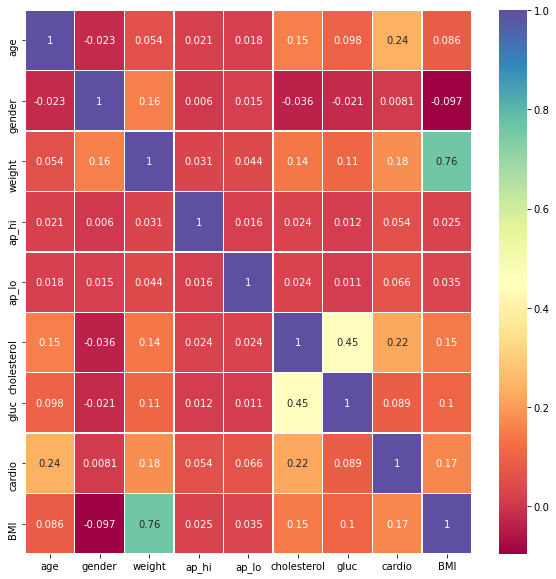

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='Spectral', annot=True, linewidths=.5, ax = ax);

### Women vs Men regarding diagnoses
When looking at the graph we see here that is shocking large amount of women are either diagnose with/without cardiovascular disease. However when compared to the mans report their numbers are drastically lower than the women counterparts. 
In fact women have reported roughly 22,000 more case than men 

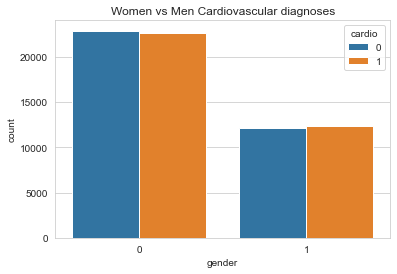

In [14]:
sns.set_style('whitegrid')
plt.title('Women vs Men Cardiovascular diagnoses')
sns.countplot(x='gender',hue='cardio',data=df)

### Glucose levels in relation between gender and disease
When plotting this graph you can see that we have three levels of glucose and we are split the report up via gender along with filtering out whether out the men/women who had glucose level one tested positive/negative for cardiovascular disease.
Looking at the results from our graph you can see there is a disproportionate level of glucose 1 for both women and men. Making a strong indication that we have people that have glucose level one more than most people 

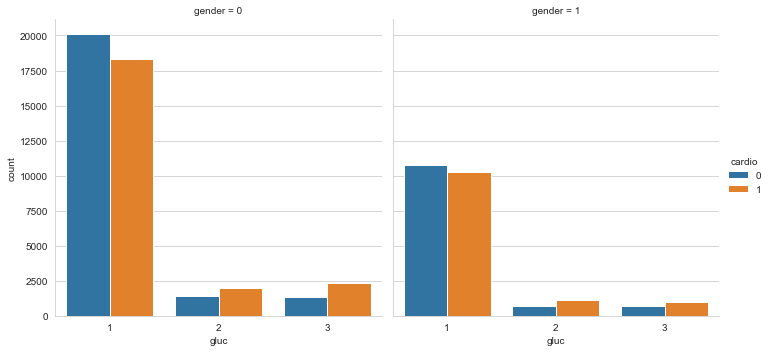

In [15]:
sns.catplot(x='gluc',hue='cardio',col='gender',data=df,kind='count')

### Cholesterol levels in relation between weight, gender, and disease
As we can see here women and men that have level 1 and level 2 cholesterol have a pretty good mix between who is positive and/or negative cardiovascular readings. However, those that have level 3 show far more positive case of the disease then the previous levels. 

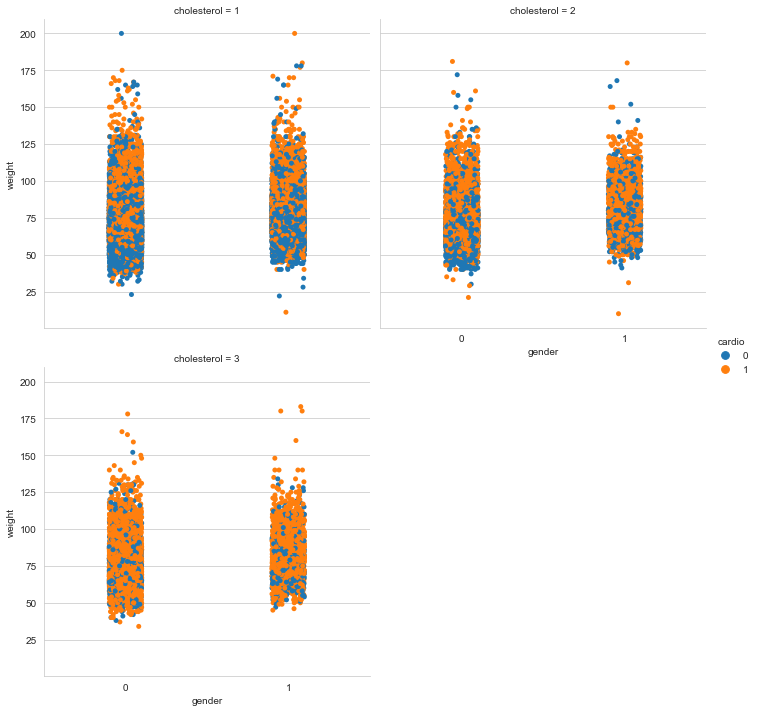

In [16]:
sns.catplot(x='gender',y='weight',col='cholesterol',hue='cardio',col_wrap=2,data=df)

### Gender age groups affect by disease
As we can see between the ages of 40-49 negative cases start to fall and positive cases start to rise from ages 40-61 years old for women and 40-58 for men. When comparing the voluman of cases report for women than men we can still this disease affects women more than men. 

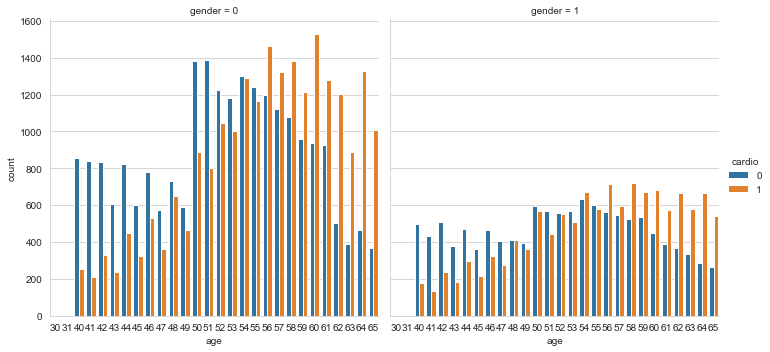

In [17]:
rcParams['figure.figsize'] = 11, 12
sns.catplot(x='age',hue='cardio',col='gender',kind='count',data=df)

# Machine learning models

### Features
- AGE:  integer (years of age)
- WEIGHT: integer (kg)
- GENDER: categorical (0: female, 1: male)
- AP_HIGH: systolic blood pressure, integer
- AP_LOW: diastolic blood pressure, integer 
- CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)
- BMI: integer

### Target
- CARDIO_DISEASE:  categorical (0: no, 1: yes)

### Logistic Regression
We first are going to start with the logistic regression model to predict the positive and negative cases of cardiovascular disease using the features below.
What you see below is the features of and target being seperated into two values 'features' and 'target', I then take those fields and further seperate their values in two training and two testing sets. For the testing set I am only going to use 30% of the original trained set. 

In [18]:
from sklearn.model_selection import train_test_split
features=['age','gender','weight','ap_hi','ap_lo','cholesterol','gluc']
target=['cardio']
X=df[features].values
y=df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

Here I start to establish the logistic model to have no penalties and to iter over 1000 times to get the best score possible for my X and y train sets. You can see that the score for both the trained and test sets are hovering over 71%, but the test set is suprisingly having a better score than the trained set. I may increase the testing size to see if the score can increase in future improvements. 

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty = 'none' , max_iter= 1000)
log.fit(X_train, y_train)
score = log.score(X_train, y_train)
score

C:\Users\marcu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7156450361416262

In [20]:
test_score = log.score(X_test, y_test)
test_score

0.7174710562675687

### Confusion Matrix
Below I am graphing a matrix that will display the trained values to our test values to determine how accurate our logistic regression model is in determining positive and negative cases of cardiovascular disease.

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
preds = log.predict(X_train)
preds_test = log.predict(X_test)
cm = metrics.confusion_matrix(y_train, preds)
cm_test = metrics.confusion_matrix(y_test, preds_test)

We can see the below model graph did report a 71% match between our testing and training sets. The prediction for trained negative cases matched 18,676 times with a fail of 5,892 cases being positive. As well as the positive predictions match 16,372 times and a fail of 8,034 cases being negetive.

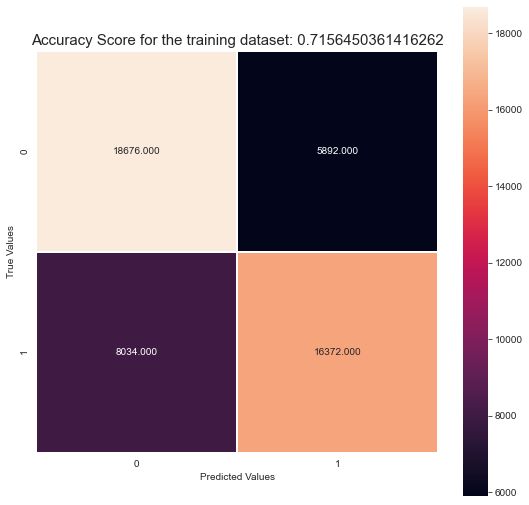

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('True Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score for the training dataset: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

Now when looking at the test prediction below we can see that the accuracy is similar to that of the trained sets. With predict negative values matching actual values 7,876 times along with positive predictions matching 7,183 times. 

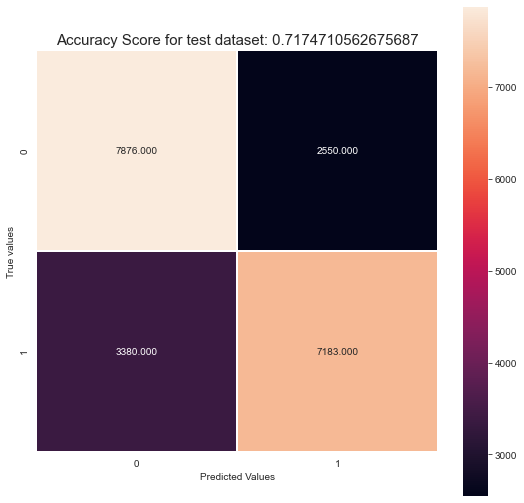

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('True values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score for test dataset: {0}'.format(test_score)
plt.title(all_sample_title, size = 15);
plt.show()

In [24]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10426
           1       0.74      0.68      0.71     10563

    accuracy                           0.72     20989
   macro avg       0.72      0.72      0.72     20989
weighted avg       0.72      0.72      0.72     20989



### Decision Tress Classifier
With having one other model creating predictions on cardiovascular cases I wanted to use decision tress to try and increase the accuracy of my predictions and strengthen my model. You can see below I am declaring the tree classifier to have a max leaf node of 100. In doing this I am trying to yield the best accuracy I can for predictions of positive and negative cases. In doing this I am able to achieve a score of 73% for both trained and test values, this being a 2% increase over the previous logistic model.

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes= 100)
dtc.fit(X_train, y_train)
score_dtc = dtc.score(X_train, y_train)
score_dtc

0.7383305427369625

In [26]:
score_dtc_test = dtc.score(X_test, y_test)
score_dtc_test

0.7344799656963171

In [27]:
dt_preds = dtc.predict(X_train)
dt_preds_test = dtc.predict(X_test)
from sklearn import metrics
cm_dt = metrics.confusion_matrix(y_train, dt_preds)
cm_dt_test = metrics.confusion_matrix(y_test, dt_preds_test)

With applying the same matrix to the our decision matrix we can see that there were an increase of 543 predicted case that matches our actual values for negative cases. As well as an increase of 568 predicted case for positive reported cases. The same can be said for the test matrix as it shows increases in the predicted cases to actual cases match. 

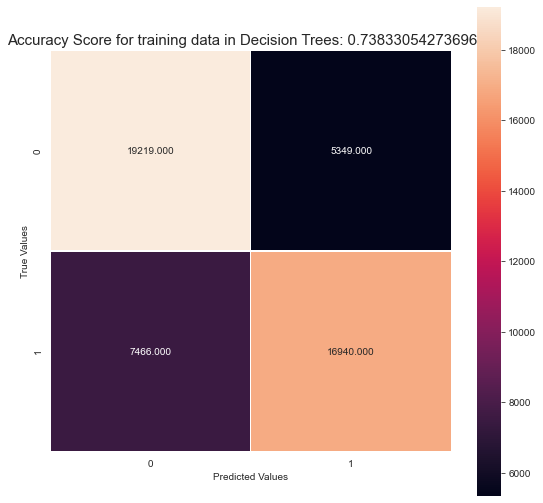

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('True Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score for training data in Decision Trees: {0}'.format(score_dtc)
plt.title(all_sample_title, size = 15);
plt.show()

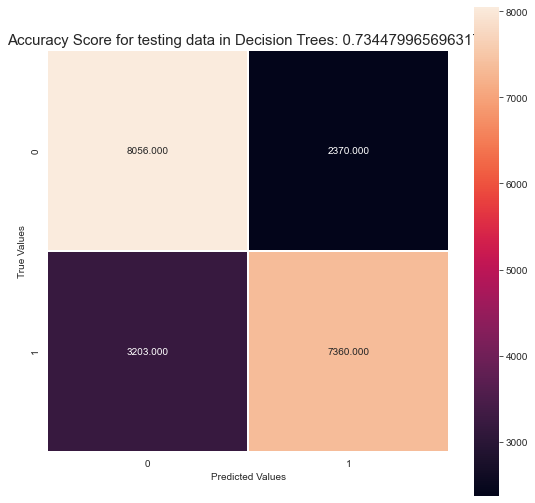

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt_test, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('True Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score for testing data in Decision Trees: {0}'.format(score_dtc_test)
plt.title(all_sample_title, size = 15);
plt.show()

In [31]:
print(classification_report(y_test, dt_preds_test))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10426
           1       0.76      0.70      0.73     10563

    accuracy                           0.73     20989
   macro avg       0.74      0.73      0.73     20989
weighted avg       0.74      0.73      0.73     20989

